In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### To obtain the eigenvalues and eigenvectors (normalized and orthogonal) from a matrix, sorting eigenvalues in ascending order
def getPCA(matrix):
    eVal,eVec=np.linalg.eigh(matrix) ### ..eigh(x) -- x is  real symmetric or complex Hermitian (conjugate symmetric) array. 
       ### Returns two objects, a 1-D array eVal =eigenvalues of matrix - eigenvalues with multiplicity, may not be ordered.
       ### and a 2-D square matrix, column v[:, i] is the normalized eigenvector corresponding to the eigenvalue w[i]. 
    indices=eVal.argsort() ### Returns the indices that would sort an array. 
    eVal,eVec=eVal[indices],eVec[:,indices] ### ensures eVal and eVec elements are increasing in order of eVal or eigenvalues
    eVal=np.diagflat(eVal) ### Create a two-dimensional array with the flattened (changing to 1dim) input eVal as a diagonal.
    return eVal,eVec

In [3]:
x = np.random.normal(0, 1, size=(50000,900)) ### first argument mean, second std dev. Random matrix dim in size (T,N)

In [4]:
eVal0,eVec0=getPCA(np.corrcoef(x,rowvar=False))
  ### matrix in getPCA argument is correlation matrix from x. 
  ### If rowvar is True (default), then each row represents a variable, with observations in the columns. 
  ### Otherwise, the relationship is transposed: each column represents a variable, while the rows contain observations.
  ### np.corrcoef(x,rowvar=False).shape = (900,900); len(eVal0) = 900; eVec0.shape is (900,900)

In [5]:
def randommatpdf(var,q,pts):  ###
    eMin, eMax = var*(1-(1./q)**.5)**2,var*(1+(1./q)**.5)**2
    eVal=np.linspace(eMin,eMax,pts) ### returns pts (no.) equally spaced vector of nos. starting at eMin to eMax
    pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
    pdf=pd.Series(pdf,index=eVal) ### Pandas uses Series (similar to 1-dim array in numpy, but essential difference 
                                  ### is the presence of the index in pandas that can be defined, 
                                  ### whereas Numpy Array has an implicitly defined integer index 
    return pdf

In [6]:
pdf0=randommatpdf(1.,q=x.shape[0]/float(x.shape[1]),pts=900) ### print(x.shape[0]) = 50,000; print(x.shape[1])=900
### Here variance var is entered as 1. pts no. must match simulated N. float() needs not be used unless item is to be divided
### and number needs be a floating type, i.e. with decimal

Text(0, 0.5, 'PDF')

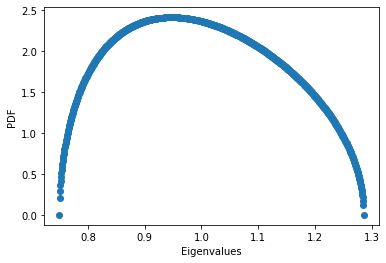

In [7]:
plt.scatter(pdf0.index, pdf0) ### This is the theoretical Marcenko-Pastur pdf of the eigenvalues 
plt.xlabel('Eigenvalues')
plt.ylabel('PDF')

In [8]:
### "print(np.diagonal(eVal0).shape)" gives (900,)
### "eVal0.shape" gives (900,900)-- 2D numpy array
eigenvalues=np.diagonal(eVal0) ### this changes the diagonal matrix eVal0 back to single column with eigenvalues.shape as (900,)
### "print(eigenvalues)" can be used to check program line is correct and delivers the required output

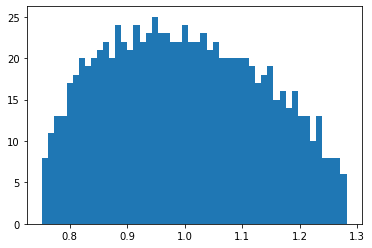

In [9]:
import matplotlib.pyplot as plt

plt.hist(eigenvalues, bins = 50)
plt.show()
### This empirical pdf seems to be explained well by the theoretical pdf

In [10]:
### kernel density estimation (KDE) is a nonparametric smoothing method to estimate a probability density estimation
### The y-axis or count of the corresponding Histogram is calibrated to pdf measures such that area under pdf = 1
### Valid kernels are [‘gaussian’|’tophat’|’epanechnikov’|’exponential’|’linear’|’cosine’] Default is ‘gaussian’.
from sklearn.neighbors import KernelDensity
def fitKDE(obs,bWidth=.25,kernel='gaussian',x=None):
    if len(obs.shape)==1: obs=obs.reshape(-1,1)
    kde=KernelDensity(kernel=kernel,bandwidth=bWidth).fit(obs)
    if x is None:x=np.unique(obs).reshape(-1,1)    
    if len(x.shape)==1: x=x.reshape(-1,1)
    logProb=kde.score_samples(x)
    pdf=pd.Series(np.exp(logProb),index=x.flatten())
    return pdf

In [11]:
pdf1=fitKDE(eigenvalues,bWidth=.01)  ### pdf1 is an object wrapping together eigenvalue and its pdf

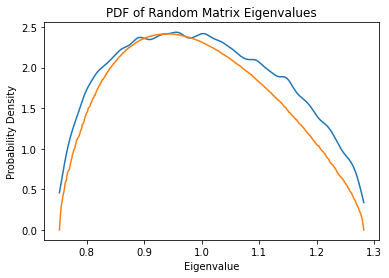

In [12]:
import seaborn as sns
fig, ax = plt.subplots()
ax = sns.lineplot(x=eigenvalues, y=pdf1, ax=ax) ### prints empirical pdf
ax = sns.lineplot(x=eigenvalues, y=pdf0, ax=ax) ### prints theoretical pdf
ax.set_title('PDF of Random Matrix Eigenvalues')
ax.set_xlabel('Eigenvalue')
ax.set_ylabel('Probability Density')
plt.show()

In [13]:
print(np.min(eigenvalues),np.max(eigenvalues))

0.7522538348526213 1.281741539366105


In [14]:
eigenvalues.sum()

900.0